In [ ]:
# Packages related to general operating system & warnings
import os
import warnings
warnings.filterwarnings('ignore')

# Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization

# Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("drive/MyDrive/creditcard.csv")

In [27]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent / (normal + fraudulent) * 100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
min(data.Amount), max(data.Amount)

(0.0, 25691.16)

In [ ]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [ ]:
data.drop(['Time'], axis=1, inplace=True)

In [ ]:
data.shape

(284807, 30)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(275663, 30)

In [ ]:
# Training and Testing
X = data.drop('Class', axis = 1).values
y = data['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
# Different Models

# Model 1: Decision Tree
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9991293748911718
F1 score of the Decision Tree model is 0.7435897435897436


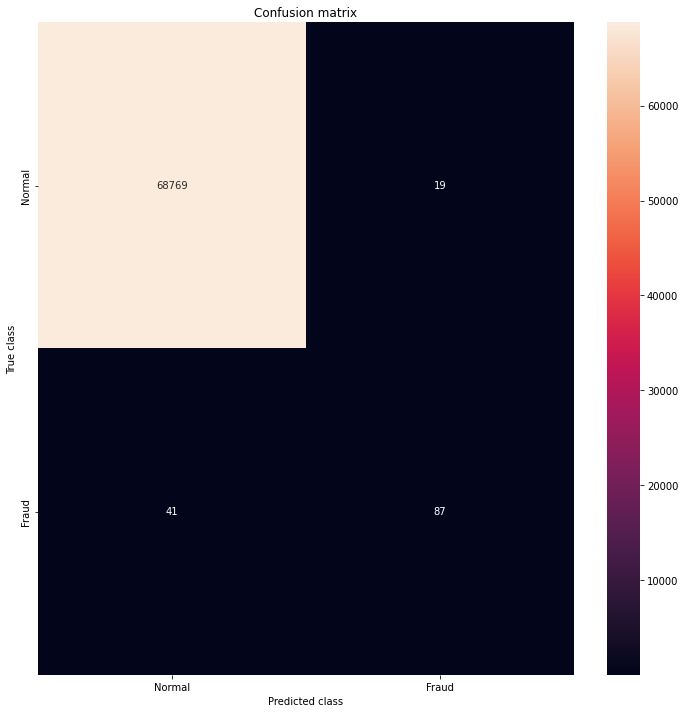

In [ ]:
LABELS_1 = ['Normal', 'Fraud']
conf_matrix_1 = confusion_matrix(y_test, dt_yhat, labels = [0, 1])
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_1, xticklabels = LABELS_1, yticklabels = LABELS_1, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# Model 2: K Nearest Neighbours (KNN)
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.999288989494457
F1 score of the K-Nearest Neighbors model is 0.7949790794979079


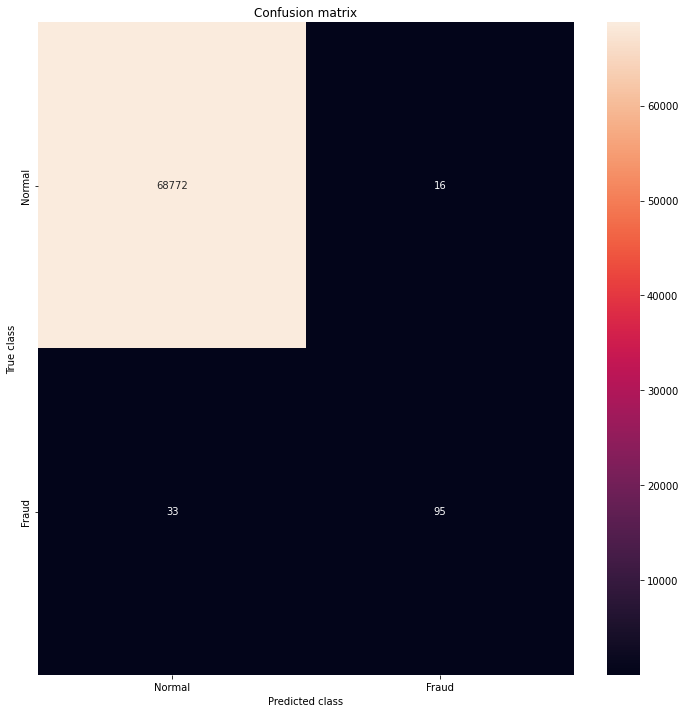

In [21]:
LABELS_2 = ['Normal', 'Fraud']
conf_matrix_2 = confusion_matrix(y_test, knn_yhat, labels = [0, 1])
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_2, xticklabels = LABELS_2, yticklabels = LABELS_2, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# Model 3: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9989552498694062
F1 score of the Logistic Regression model is 0.6666666666666666


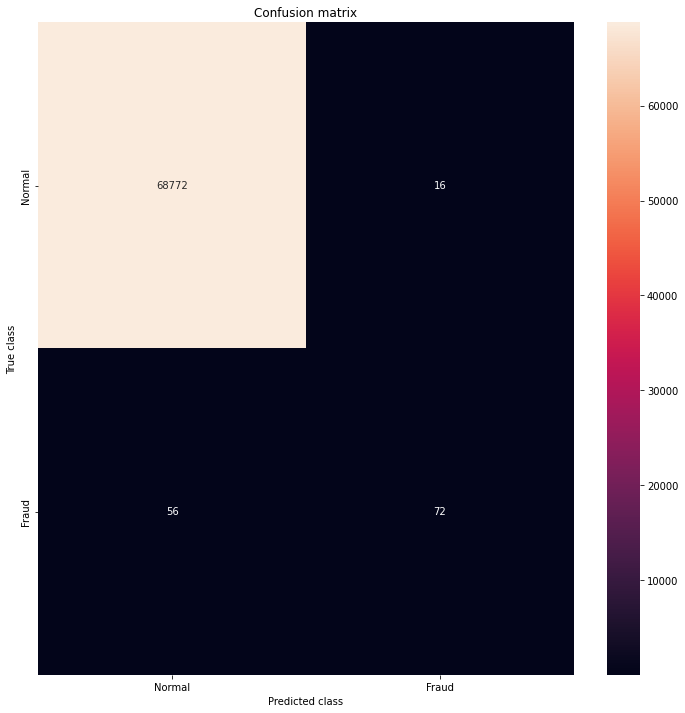

In [22]:
LABELS_3 = ['Normal', 'Fraud']
conf_matrix_3 = confusion_matrix(y_test, lr_yhat, labels = [0, 1])
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_3, xticklabels = LABELS_3, yticklabels = LABELS_3, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [23]:
# Model 4: Random Forest
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9991148644726914
F1 score of the Random Forest model is 0.71889400921659


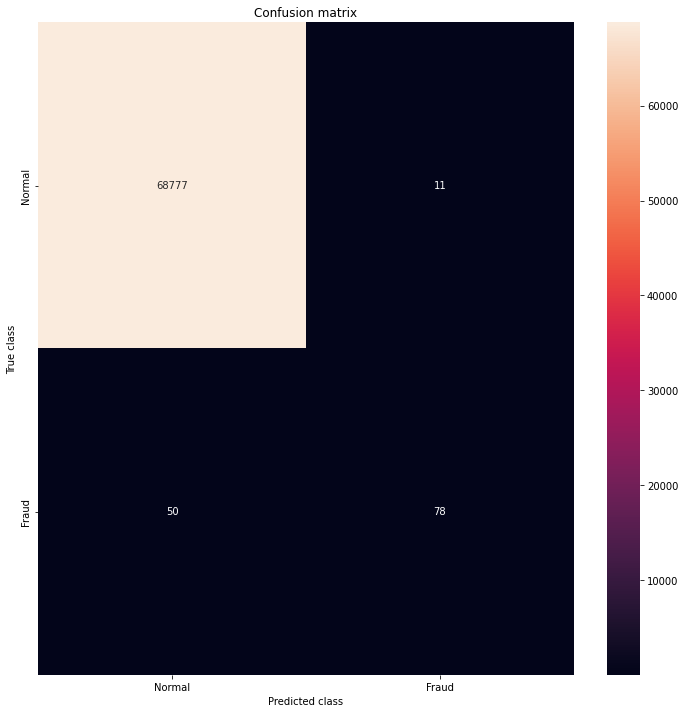

In [25]:
LABELS_4 = ['Normal', 'Fraud']
conf_matrix_4 = confusion_matrix(y_test, rf_yhat, labels = [0, 1])
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_4, xticklabels = LABELS_4, yticklabels = LABELS_4, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [24]:
# Model 5: XGBoost
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9994486040977422
F1 score of the XGBoost model is 0.831858407079646


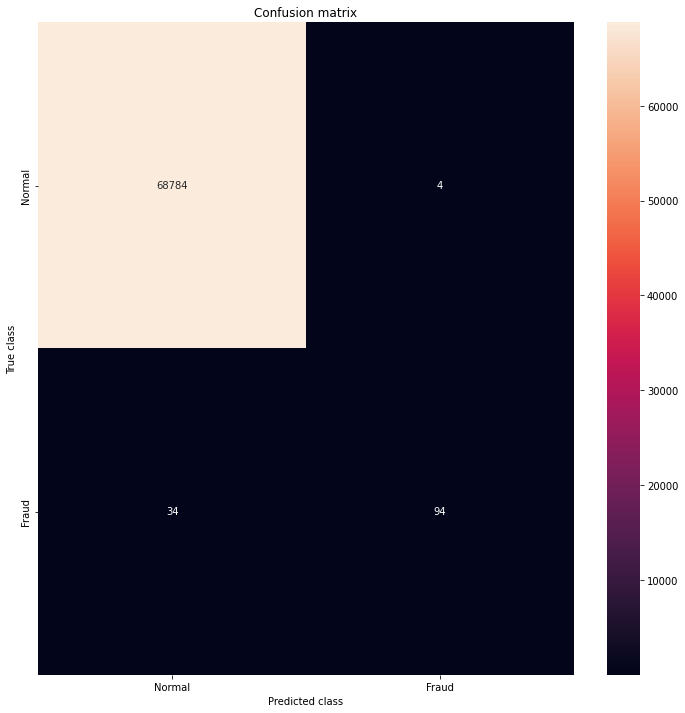

In [26]:
LABELS_5 = ['Normal', 'Fraud']
conf_matrix_5 = confusion_matrix(y_test, xgb_yhat, labels = [0, 1])
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_5, xticklabels = LABELS_5, yticklabels = LABELS_5, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()